In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('MedicalPremium.csv')
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [3]:
data.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [5]:
data.Age.describe()

count    986.000000
mean      41.745436
std       13.963371
min       18.000000
25%       30.000000
50%       42.000000
75%       53.000000
max       66.000000
Name: Age, dtype: float64

In [6]:
data.PremiumPrice.describe()

count      986.000000
mean     24336.713996
std       6248.184382
min      15000.000000
25%      21000.000000
50%      23000.000000
75%      28000.000000
max      40000.000000
Name: PremiumPrice, dtype: float64

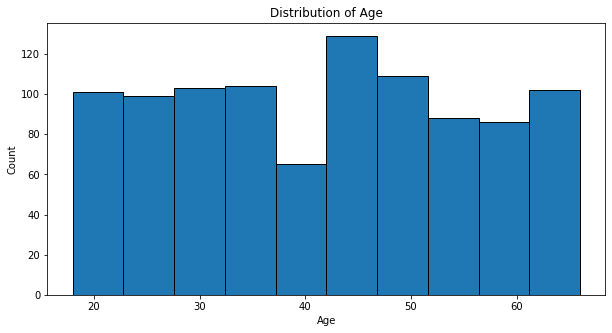

In [7]:
plt.figure(figsize=(10,5))
plt.hist(data.Age,edgecolor='k')
plt.xlabel("Age")
plt.ylabel("Count");
plt.title("Distribution of Age");

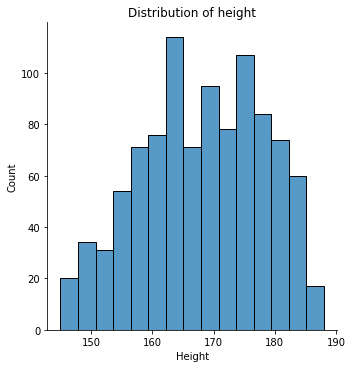

In [8]:
sns.displot(data.Height)
plt.title("Distribution of height");

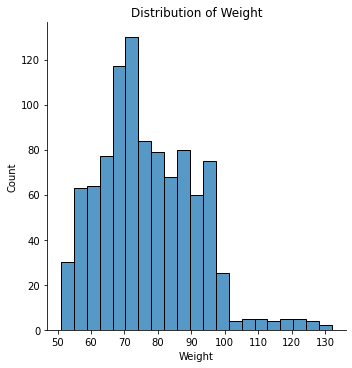

In [9]:
sns.displot(data.Weight)
plt.title("Distribution of Weight");

In [10]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [11]:
X.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,0,0,0,0,155,57,0,0,0
1,60,1,0,0,0,180,73,0,0,0
2,36,1,1,0,0,158,59,0,0,1
3,52,1,1,0,1,183,93,0,0,2
4,38,0,0,0,1,166,88,0,0,1


In [12]:
Y.head()

0    25000
1    29000
2    23000
3    28000
4    23000
Name: PremiumPrice, dtype: int64

In [13]:
# from sklearn.preprocessing import StandardScaler
# scalar = StandardScaler()
# X.Age = scalar.fit_transform(X[['Age']])
# X.Height = scalar.fit_transform(X[['Height']])
# X.Weight = scalar.fit_transform(X[['Weight']])

In [14]:
X.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,0,0,0,0,155,57,0,0,0
1,60,1,0,0,0,180,73,0,0,0
2,36,1,1,0,0,158,59,0,0,1
3,52,1,1,0,1,183,93,0,0,2
4,38,0,0,0,1,166,88,0,0,1


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=43)

In [16]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from xgboost import XGBRFRegressor,XGBClassifier,XGBRegressor

In [17]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [18]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
xgbr = XGBRFRegressor(n_estimators=65)
xgbr.fit(X_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=65, n_jobs=0, num_parallel_tree=65,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [33]:
print("Accuracy Score for RandomForestRegressor is : ",rfr.score(X_test,y_test)*100,"%")
print("Accuracy Score for RandomForestClassifier is : ",rfc.score(X_test,y_test)*100,"%")
print("Accuracy Score for XGBRFRegressor is : ",xgbr.score(X_test,y_test)*100,"%")

Accuracy Score for RandomForestRegressor is :  81.9361879324622 %
Accuracy Score for RandomForestClassifier is :  92.71255060728745 %
Accuracy Score for XGBRFRegressor is :  81.8715861577763 %


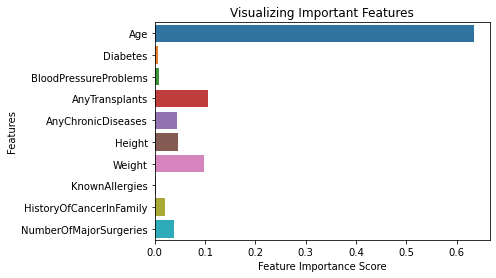

In [34]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)
feature_imp1 = random_forest.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show();

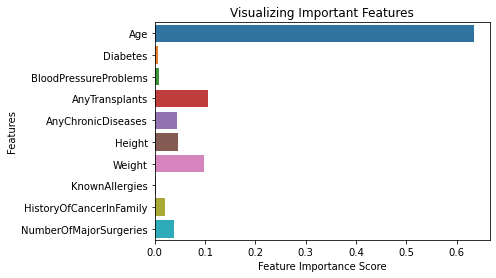

In [35]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train)
feature_imp2 = random_forest_classifier.feature_importances_
sns.barplot(x=feature_imp1, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show();

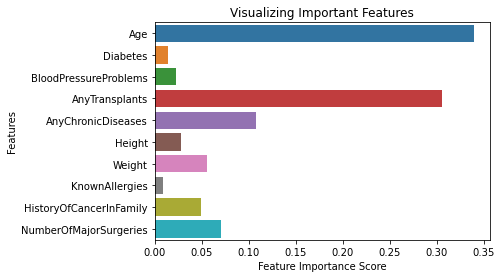

In [36]:
xgboost =XGBRFRegressor()
xgboost.fit(X_train,y_train)
feature_imp3 = xgboost.feature_importances_
sns.barplot(x=feature_imp3, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show();

In [37]:
rfr_pred = rfr.predict(X_test)
rfc_pred = rfc.predict(X_test)
xgbr_pred = rfr.predict(X_test)

In [38]:
import pickle
# pickle.dump(scalar,open("scaling.pkl","wb"))
pickle.dump(rfr,open('RandomForestRegressor.pkl','wb'))
pickle.dump(rfc,open('RandomForestClassifier.pkl','wb'))
pickle.dump(xgbr,open('XGBRFRegressor.pkl','wb'))

In [39]:
scalar_load = pickle.load(open('scaling.pkl','rb'))
rfr_load = pickle.load(open('RandomForestRegressor.pkl','rb'))
rfc_load = pickle.load(open('RandomForestClassifier.pkl','rb'))
xgbr_load = pickle.load(open('XGBRFRegressor.pkl','rb'))

In [44]:
temp={}

temp['Age'] = 43
temp['Diabetes'] =0
temp['BloodPressureProblems'] =1
temp['AnyTransplants'] =0
temp['AnyChronicDiseases'] =1
temp['Height'] =181
temp['Weight'] =73
temp['KnownAllergies'] =0
temp['HistoryOfCancerInFamily'] =0
temp['NumberOfMajorSurgeries'] =1

# temp['Age'] = 45
# temp['Diabetes'] =1
# temp['BloodPressureProblems'] =0
# temp['AnyTransplants'] =0
# temp['AnyChronicDiseases'] =0
# temp['Height'] =155
# temp['Weight'] =57
# temp['KnownAllergies'] =0
# temp['HistoryOfCancerInFamily'] =0
# temp['NumberOfMajorSurgeries'] =0

testdata = pd.DataFrame({'x':temp}).transpose()
testdata

,Age,AnyChronicDiseases,AnyTransplants,BloodPressureProblems,Diabetes,Height,HistoryOfCancerInFamily,KnownAllergies,NumberOfMajorSurgeries,Weight
x,43,1,0,1,0,181,0,0,1,73


In [45]:
predictData1 = rfr_load.predict(testdata)
predictData2 = rfc_load.predict(testdata)
predictData3 = xgbr_load.predict(testdata)
print(predictData1,predictData2,predictData3)

[30480.] [28000] [30984.363]
